In [2]:
import pandas as pd
df = pd.read_csv("Pacientes_covid.csv")
import matplotlib.pyplot as plt

In [7]:
df.head(10)

,Nombre,Sexo,Edad,Vive,Asintomático,Secuelas,Vacunado
0,Amada Vendrell Suárez,Femenino,33,Sí,No,No,No
1,Telmo de Andreu,Masculino,50,Sí,No,No,Sí
2,Victoriano Enríquez Prada,Masculino,1,Sí,No,No,Sí
3,Abel del Marqués,Masculino,100,Sí,No,No,Sí
4,Caridad Angulo Fiol,Femenino,49,Sí,No,Sí,No
5,Sandalio Leon,Masculino,24,Sí,Sí,No,Sí
6,Gervasio Seco,Masculino,56,Sí,Sí,No,Sí
7,Bonifacio Alberto Pizarro,Masculino,13,Sí,No,No,No
8,Encarnita Corona Ramos Moreno,Femenino,12,Sí,Sí,No,Sí
9,Vanesa Sierra Isern,Femenino,53,Sí,No,No,Sí


In [8]:
(df.shape, df.dtypes)

((100, 7),
 Nombre          object
 Sexo            object
 Edad             int64
 Vive            object
 Asintomático    object
 Secuelas        object
 Vacunado        object
 dtype: object)

In [10]:
# Distribuciones simples
sexo = df["Sexo"].value_counts()
vac = df["Vacunado"].value_counts()
asint = df["Asintomático"].value_counts()
sec = df["Secuelas"].value_counts()
vive = df["Vive"].value_counts()

sexo, vac, asint, sec, vive


(Sexo
 Masculino    54
 Femenino     46
 Name: count, dtype: int64,
 Vacunado
 Sí    75
 No    25
 Name: count, dtype: int64,
 Asintomático
 No    71
 Sí    29
 Name: count, dtype: int64,
 Secuelas
 No    92
 Sí     8
 Name: count, dtype: int64,
 Vive
 Sí    100
 Name: count, dtype: int64)

In [11]:
#Aqui se ve un ejemplo de un masculino y un femenino

In [12]:
# Porcentajes
porc_vac = df["Vacunado"].value_counts(normalize=True).mul(100).round(1)
porc_asint = df["Asintomático"].value_counts(normalize=True).mul(100).round(1)
porc_sec = df["Secuelas"].value_counts(normalize=True).mul(100).round(1)
porc_vive = df["Vive"].value_counts(normalize=True).mul(100).round(1)

porc_vac, porc_asint, porc_sec, porc_vive


(Vacunado
 Sí    75.0
 No    25.0
 Name: proportion, dtype: float64,
 Asintomático
 No    71.0
 Sí    29.0
 Name: proportion, dtype: float64,
 Secuelas
 No    92.0
 Sí     8.0
 Name: proportion, dtype: float64,
 Vive
 Sí    100.0
 Name: proportion, dtype: float64)

In [13]:
# Aquí vemos en porcentaje cuantos estan vacunados y cuantos no, cuantos asintomaticos
# los que tienen secuelas, y se puede ver que el 100 porciento está con vida

In [15]:
# Edad promedio por grupo
edad_promedio_por_vacuna = df.groupby("Vacunado")["Edad"].mean().round(1)
edad_promedio_por_sexo = df.groupby("Sexo")["Edad"].mean().round(1)
edad_promedio_por_vive = df.groupby("Vive")["Edad"].mean().round(1)

edad_promedio_por_vacuna, edad_promedio_por_sexo, edad_promedio_por_vive



(Vacunado
 No    26.6
 Sí    49.6
 Name: Edad, dtype: float64,
 Sexo
 Femenino     48.1
 Masculino    40.2
 Name: Edad, dtype: float64,
 Vive
 Sí    43.8
 Name: Edad, dtype: float64)

In [16]:
#Aquí se ve la edad promedio de los que no y si se vacunaron, edad promedio de femeninos y masculinos
# y la edad promedio de todos los que viven

<Axes: title={'center': 'Vacunados vs No vacunados'}, xlabel='Vacunado'>

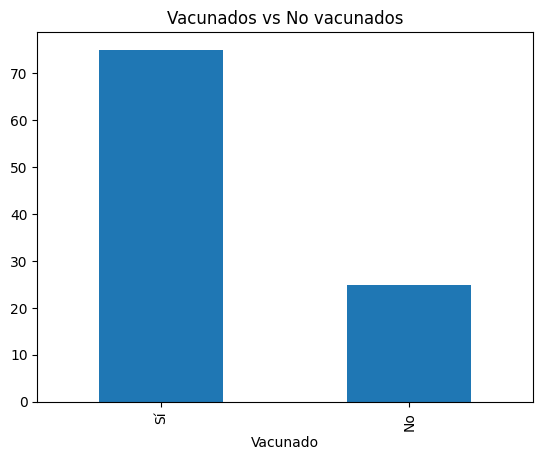

In [17]:
# Distribución de vacunación
df["Vacunado"].value_counts().plot(kind="bar", title="Vacunados vs No vacunados")


In [18]:
#Grafico de los vacunados

<Axes: title={'center': 'Asintomáticos'}, xlabel='Asintomático'>

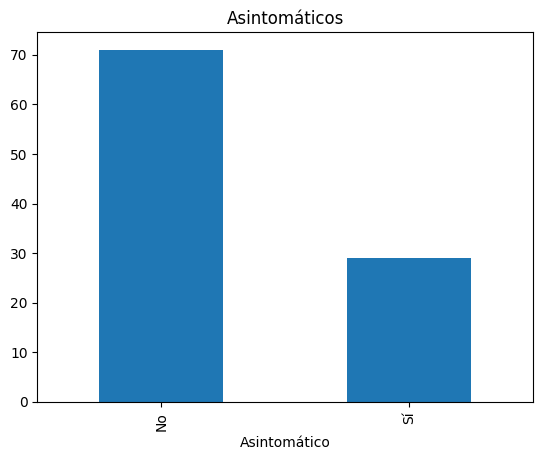

In [19]:
# Distribución de asintomáticos
df["Asintomático"].value_counts().plot(kind="bar", title="Asintomáticos")


In [21]:
#Grafica de los asintomaticos: significa tener enfermedad sin presentar sintomas visibles
# se refiere a personas infectadas con el virus pero no muestran fiebre, tos, dificultad para respirar
# 

<Axes: title={'center': 'Distribución de edades'}, ylabel='Frequency'>

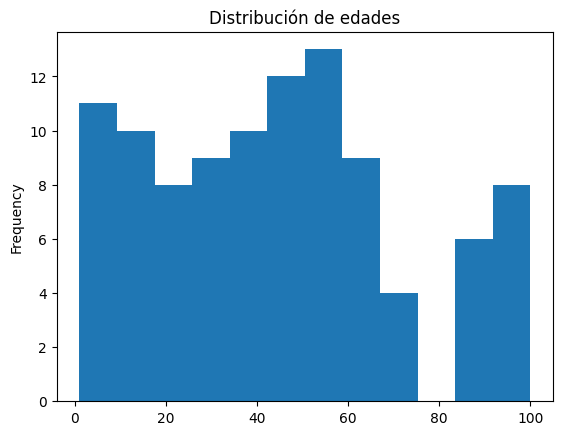

In [22]:
# Histograma de edades
df["Edad"].plot(kind="hist", bins=12, title="Distribución de edades")


In [23]:
#Distribucion de edades. 

<Axes: title={'center': 'Secuelas según vacunación (proporciones)'}, xlabel='Vacunado'>

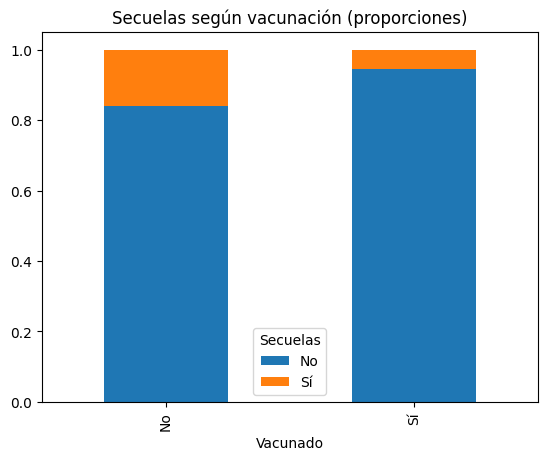

In [25]:
#
pd.crosstab(df["Vacunado"], df["Secuelas"], normalize="index").plot(
    kind="bar", stacked=True, title="Secuelas según vacunación (proporciones)"
)


In [26]:
#Proporciones de secuelas segun su vacunacion

In [35]:
#Este grafico muestra la proporcion de pacientes con y sin secuelas
# en x se ve si estan vacunados. En y se ve el porcentaje de pacientes 
#La barra se divide en dos, donde azul es no tiene cecuelas
# si la parte azul es mayor en vacunados, significa que la vacunacion ayuda a reducir la aparicion de secuelas

In [27]:
total = len(df)
resumen = pd.Series({
    "Total de pacientes": total,
    "% Vacunados": df["Vacunado"].value_counts(normalize=True).get("Sí", 0)*100,
    "% Asintomáticos": df["Asintomático"].value_counts(normalize=True).get("Sí", 0)*100,
    "% Con secuelas": df["Secuelas"].value_counts(normalize=True).get("Sí", 0)*100
}).round(1)

resumen


Total de pacientes    100.0
% Vacunados            75.0
% Asintomáticos        29.0
% Con secuelas          8.0
dtype: float64

In [ ]:
#Los hallazgos encontrados

In [29]:
#Las tics son para digitalizar registros y evitar perdidas, facilitar analisis

In [30]:
# sirve para dar reportes periodos con notebooks programados

In [31]:
#Acceso remoto automatizado

In [32]:
#Se itnegra con sistemas hospitalarios

In [33]:
#Los datos se organizan en una base de datos relacional, sql. 